## Multiple Features

Linear regression with multiple variables is also known as **"multivate linear regression"**.

We now introduce notation for equations where we can have any number of input variables.

- $x_j^{(i)}$ - value of feature $j$ in the $i$th training example

- $x^{(i)}$ - the input (features) of the $i$th training example

- $m$ - the number of training examples

- $n$ - the number of features

The multivariable form of the hypothesis function accomodating these multiple features is as follows:

$$ h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n $$

In order to develop intuition about this function, we can think about $\theta_0$ as the basic price of a house, $\theta_1$ as the price per square meter, $\theta_2$ as the price per floor, etc.

$x_1$ will be the number of square meters in the house, $x_2$ the number of floors, etc.

Using the definition of matrix multiplication, our multivariable hypothesis function can be concisely represented as:

$$
h_{\theta}(x) = \big[ \theta_0 \quad \theta_1 \quad ... \quad \theta_n \big] []
$$

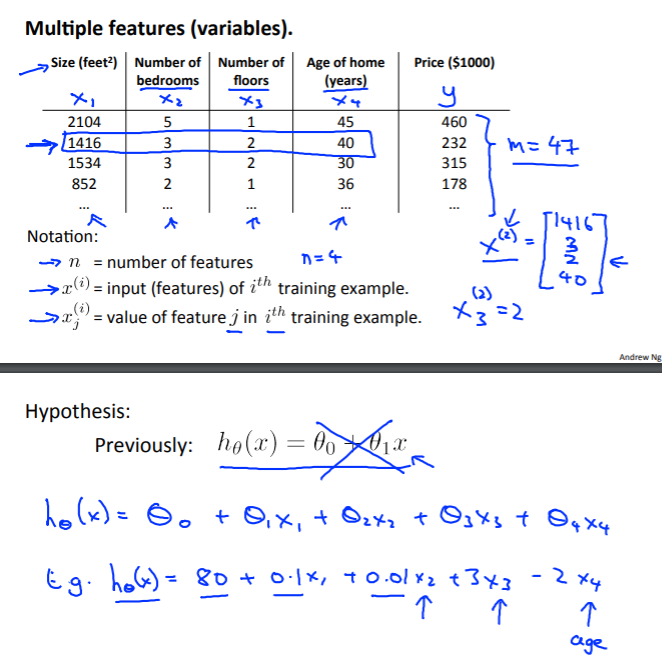

This is a vectorization of our hypothesis function for one training example.

Note that for convenience reasons, we assume $x_0^{(i)} = 1 for (i \in 1, ..., m)$. This allows us to do matrix operations with $\theta$ and $x$. Hence making the two vectors $\theta$ and $x^{(i)}$ match each other element-wise (that is, have the same number of elements: n+1).

## Gradient Descent for Multiple Variables

The gradient descent equation itself is generally the same form; we just have to repeat it for our 'n' features:

repeat until convergence:
$$
\left\{
\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)}) \bullet x_0^{(i)}
\\
\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)}) \bullet x_1^{(i)}
\\
\theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)}) \bullet x_2^{(i)}
\right\}
$$

In other words:

repeat until convergence: $$
\left\{
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{j=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})\bullet x_j^{(i)} \quad for j:= 0...n
\right\}
$$

The following image compares gradient descent with one variable to gradient descent with multiple variables:

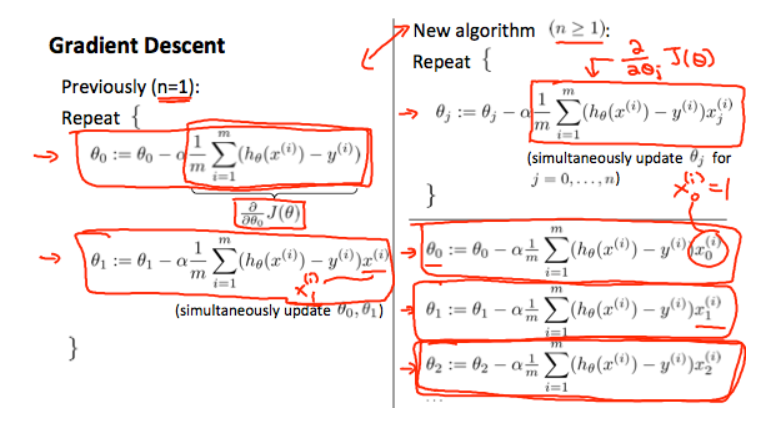

## Gradient Descent in Practice I - Feature Scaling

We can speed up gradient descent by having each of our input values in roughly the same range. This is because $\theta$ will descend quickly on small ranges and slowly on large ranges, annd so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$$
-1 <= x_{(i)} <= 1
$$

or 

$$
-0.5 <= x_{(i)} <= 0.5
$$

These aren't exact requirements; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.

Two techniques to help with this are **feature scaling** and **mean normalization**.

Feature scalling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1.

Mean nrmalization involves substractinf the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just 0.

To implement both of these techniques, adjusst your input values as shown in this formula:

$$
x_i := \frac{x_i - \mu_i}{s_i}
$$

Where $\mu_i$ is the **average** of all values for feature $(i)$ and $s_i$ is the range of values $(max - min)$, or $s_i$ is the standard deviation.

Note that dividing by the range, or dividing by the standard deviation, give different results.

Example:

If $x_i$ represents housing prices with a range from 100 to 2000 and a mean value of 1000, then:

$$
x_i := \frac{price - 1000}{1900}
$$

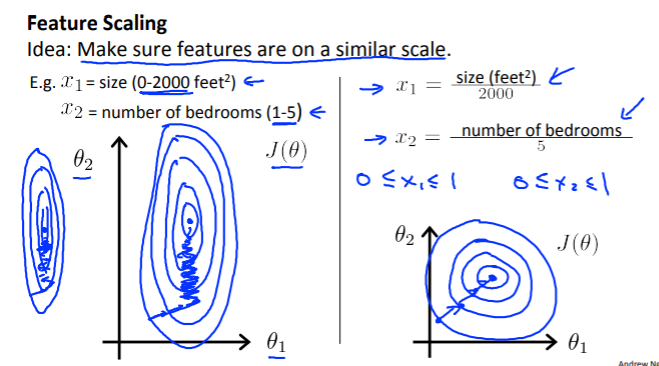

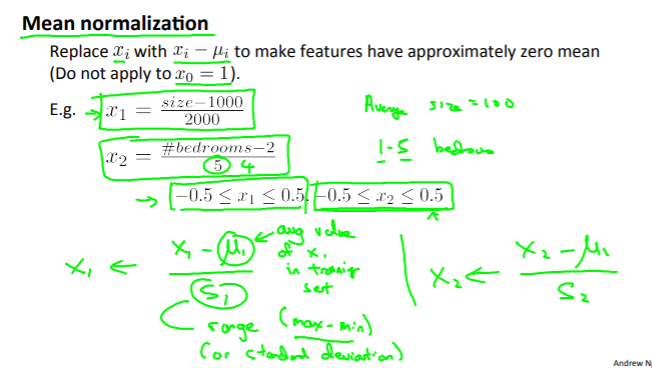

## Gradient Descent in Practice II - Learning Rate

**Debugging gradient descent.**

1. Make a plot with *number of iterations* on the x-axis. 

2. Now plot the cost function, $J(\theta)$ over the number of iteration of gradient descent. If $J(\theta)$ ever increases, then you probably need to decrease $\alpha$.

**Authomatic convergence test.**

1. Declare convergence is $J(\theta)$ decreases by less than $E$ in one iteration, where $E$ is some small value, such as $10^{-3}$. However in practice it's difficult to choose this threshold value.

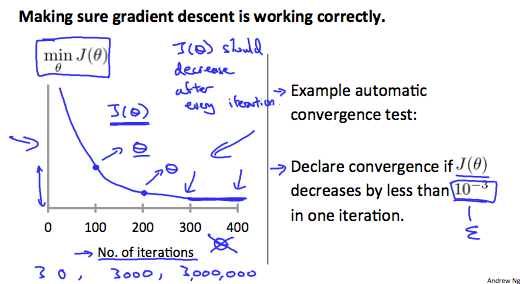

It has been proven that if learning rate $\alpha$ is sufficiently small, then $J(\theta)$ will decrease on every iteration.

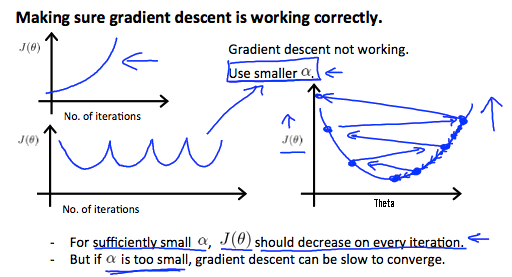

To summarize:

- If $\alpha$ is too small: slow convergence.

- If $\alpha$ is too large: may not decrease on every iteration and thus may nnot converge

## Features and Polynomial Regression

We can improve our features and the form of our hypothesis function in a couple different ways.

We can **combine** multiple features into one. For example, we can combine $x_1$ and $x_2$ into a new feature $x_3$ by taking $x_1 \bullet x_2$.

#### Polynomial Regression

Our hypothesis function need not to be linear (a straight line) if that doesn't fit the data well.

We can **change the behaviour or curve** of our hypothesis function by making it a quadratic, cubic or square root function (or any other form(.

For example, if our hypothesis function is $h_{\theta} = \theta_0 + \theta_1x_1$ then we can create additional features based on $x_1$, to get the quadratic function $h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2 x_1^2$ or the cubic function $h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_1^2 + \theta_3x_1^3$.

In the cubic version, we have created new features $x_2$ and $x_3$ where $x_2 = x_1^2$ and $x_3 = x_1^3$.

To make it a square root function, we could do: $h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2\sqrt{x_1}$.

One important thing to keep in mind is, if you choose your features this way then feature scalling becomes very **important**.

For example:

If $x_1$ has range 1-1000, then range of $x_1^2$ becomes 1 - 1,000,000, and that of $x_1^3$ becmes 1 - 1,000,000,000.

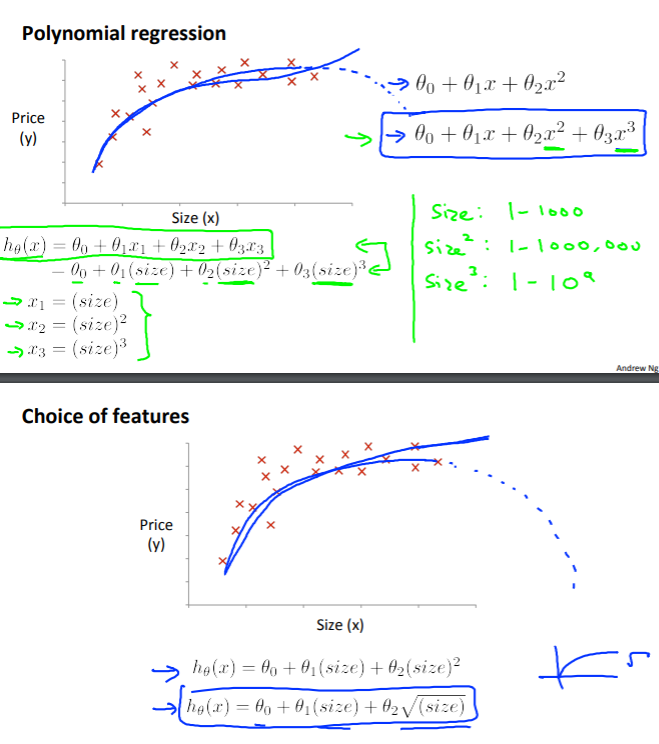